#**Módulo 02: Visualização de dados com Seaborn e Matplotlib**



#Bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from io import StringIO

pd.options.display.float_format = '{:.2f}'.format

#Leitura de dados

###Procedimentos hospitalares do SUS - por local de internação - Brasil
Valor total por Unidade da Federação e Ano/mês atendimento

In [6]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",", engine='python')
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


###Estimativa populacional do Brasil em 2020- IBGE

In [7]:
ibge_estimativa = pd.read_excel('https://github.com/pabloaugmat/Bootcamp_DataScience_Modulo02/raw/main/POP2020_20210331.xls')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


##Tratamento e fatiamento dos dados(realizados no módulo 01):

In [8]:
colunas_usaveis = dados.mean().index.tolist()

In [9]:
colunas_usaveis.insert(0, "Unidade da Federação")

In [10]:
usaveis = dados[colunas_usaveis]

In [11]:
usaveis = usaveis.sort_values('Total',axis=0,ascending=False)

In [12]:
usaveis = usaveis.drop('Total', axis=1)

In [13]:
usaveis.set_index("Unidade da Federação",inplace=True)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,...,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33


In [14]:
usaveis = usaveis[usaveis.columns[6:]]

In [15]:
mes_mais_recente = usaveis[usaveis.columns[-1]]
mes_mais_recente.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

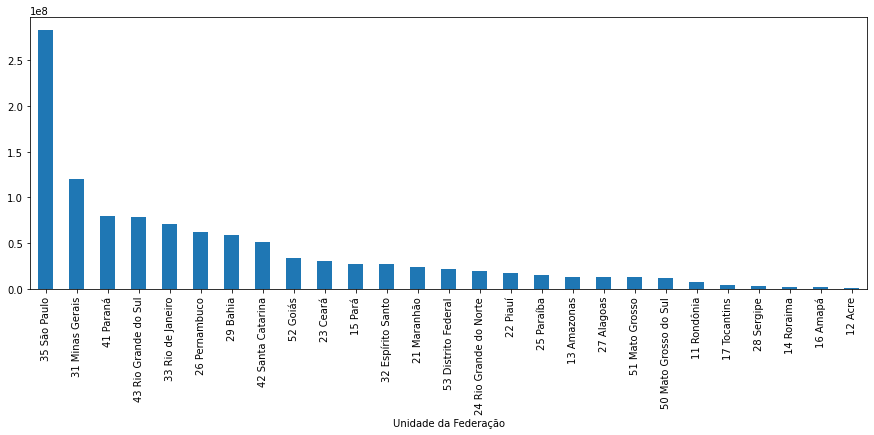

In [16]:
mes_mais_recente = mes_mais_recente.sort_values(ascending=False)
mes_mais_recente.plot(kind='bar', figsize=(15,5))

plt.show()

#01. Fontes externas, limpeza e manipulação de dados

##Usando fontes alternativas de dados




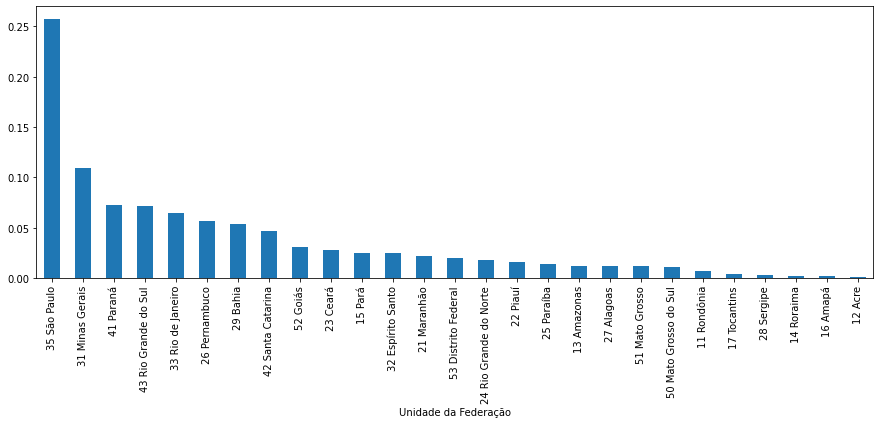

In [17]:
gastos_proporcionais = mes_mais_recente/mes_mais_recente.sum()
gastos_proporcionais.plot(kind='bar', figsize=(15,5))
plt.show()

###População por Unidade Federal - Wikipedia


In [18]:
populacao_por_uf = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
 """

In [19]:
populacao_por_uf_io = StringIO(populacao_por_uf)

populacao = pd.read_csv(populacao_por_uf_io, sep='\t')

populacao.rename(columns={"Posição":"posicao","População":"populacao", "Unidade federativa":"uf"},inplace=True)
populacao.rename(str.lower,axis='columns',inplace=True)
populacao.dropna(inplace=True)
populacao['populacao'] = populacao['populacao'].str.replace(" ","").astype(int)


display(populacao.head())
display(populacao.info())

,posicao,uf,populacao,% da pop. total,país comparável
1,1,São Paulo,46289333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21292666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14930634,"7,1%",Chade (14 037 000)
5,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posicao          27 non-null     object
 1   uf               27 non-null     object
 2   populacao        27 non-null     int64 
 3   % da pop. total  27 non-null     object
 4   país comparável  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


None

In [20]:
populacao.set_index('uf', inplace=True)

In [21]:
populacao = populacao[['populacao']]
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


##Manipulação e junção de tabelas

###Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [22]:
def clear_and_join(dataframe_pop, dataframe_mes):

  dataframe_mes.index = dataframe_mes.index.str[3:]

  dataframe_pop.index = dataframe_pop.index.str.strip()

  for estado in dataframe_mes.index:
    dataframe_pop.index = dataframe_pop.index.str.replace(f"{estado} {estado}", estado)

  dataframe_unido = dataframe_pop.join(dataframe_mes)

  return dataframe_unido


In [23]:
populacao_gastos_mais_recente = clear_and_join(populacao, mes_mais_recente)
populacao_gastos_mais_recente

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69
Rio Grande do Sul,11422973,78929703.81
Pernambuco,9616621,62325444.34
Ceará,9187103,30809221.22
Pará,8690745,27618727.51


#02. Proporcionalidades e Seaborn

##Visualização, Seaborn e Proporcionalidades



In [24]:
populacao_gastos_mais_recente.rename(columns={'2020/Jul':'gastos'}, inplace=True)
populacao_gastos_mais_recente.head()

,populacao,gastos
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69


In [25]:
populacao_gastos_mais_recente['gasto_por_habitante']=populacao_gastos_mais_recente['gastos']/populacao_gastos_mais_recente['populacao']

In [26]:
populacao_gastos_mais_recente

,populacao,gastos,gasto_por_habitante
uf,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21292666,120467187.34,5.66
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97
Rio Grande do Sul,11422973,78929703.81,6.91
Pernambuco,9616621,62325444.34,6.48
Ceará,9187103,30809221.22,3.35
Pará,8690745,27618727.51,3.18


<AxesSubplot:xlabel='uf'>

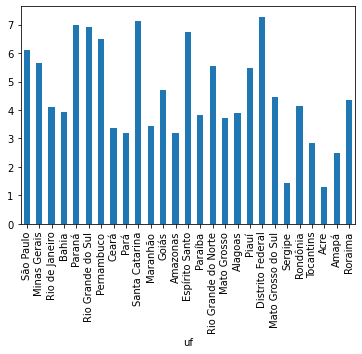

In [27]:
populacao_gastos_mais_recente['gasto_por_habitante'].plot(kind='bar')

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante'>

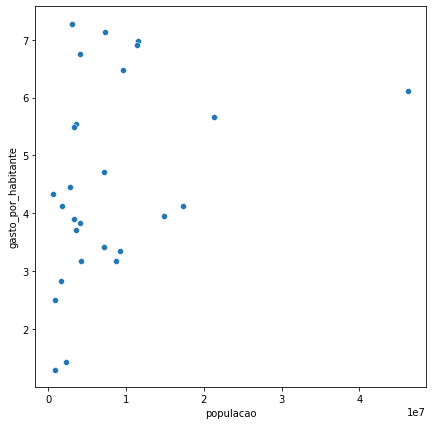

In [28]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=populacao_gastos_mais_recente, x='populacao', y='gasto_por_habitante')

##Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.



In [29]:
populacao_gastos_mais_recente.sort_values('gasto_por_habitante', ascending=False, inplace=True)

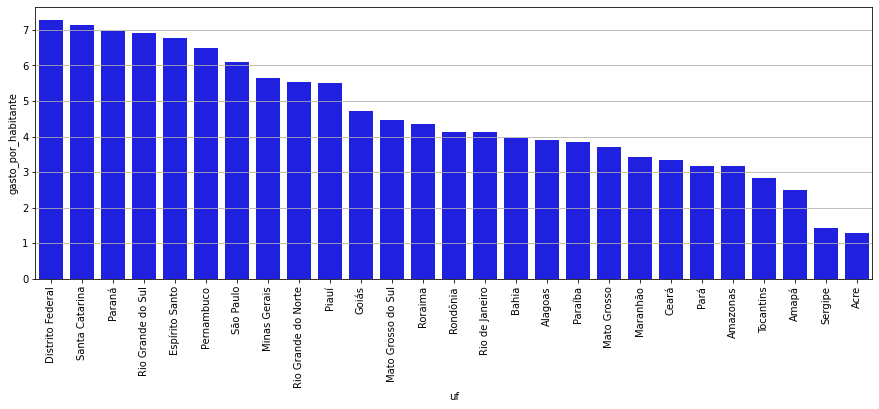

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(data=populacao_gastos_mais_recente, x=populacao_gastos_mais_recente.index, y='gasto_por_habitante', color='b')

plt.grid(axis='y')

plt.xticks(rotation=90)

plt.show()

##Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [31]:
gastos_jun_2020=usaveis[[usaveis.columns[-2]]]

In [32]:
gastos_jun_2020.index=gastos_jun_2020.index.str[3:]

In [33]:
populacao_gastos_jun2020 = populacao.join(gastos_jun_2020)

In [34]:
populacao_gastos_jun2020.rename(columns={'2020/Jun':'gastos'}, inplace=True)

In [35]:
populacao_gastos_jun2020['gasto_por_habitante'] = populacao_gastos_jun2020['gastos'] / populacao_gastos_jun2020['populacao']

In [36]:
populacao_gastos_jun2020.head()

,populacao,gastos,gasto_por_habitante
uf,,,
São Paulo,46289333,299060851.62,6.46
Minas Gerais,21292666,135977571.87,6.39
Rio de Janeiro,17366189,77604925.21,4.47
Bahia,14930634,65159300.63,4.36
Paraná,11516840,92901461.36,8.07


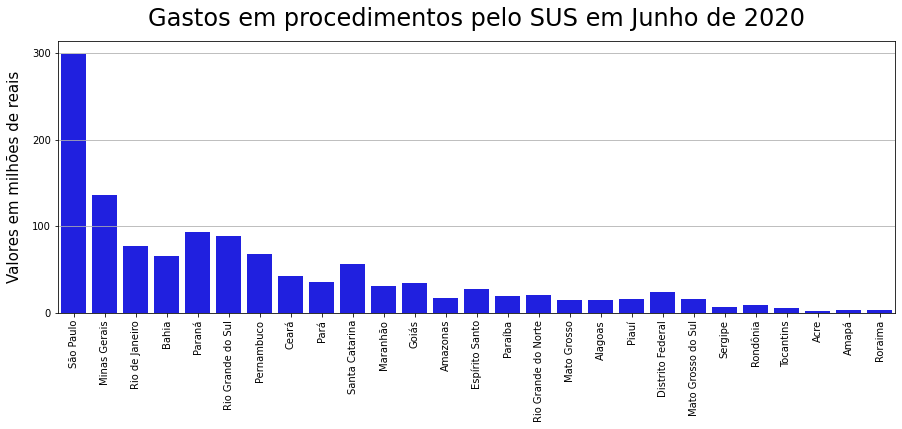

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(data=populacao_gastos_jun2020/1000000, x = populacao_gastos_jun2020.index, y= 'gastos',color='b')
sns.set_context('poster')

plt.title("Gastos em procedimentos pelo SUS em Junho de 2020",pad=15)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Valores em milhões de reais', fontsize=15, labelpad=10)
plt.grid(axis='y')

plt.show()

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante'>

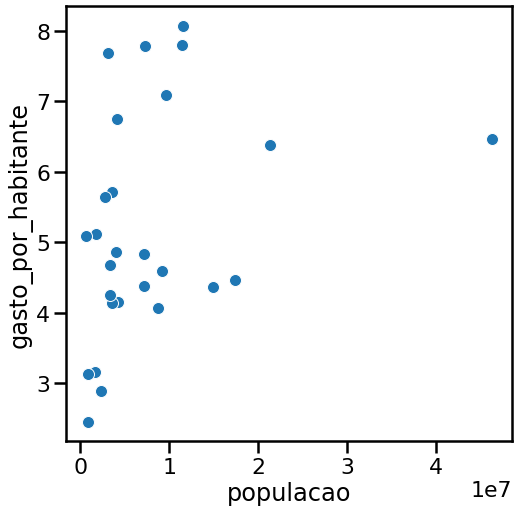

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=populacao_gastos_jun2020, x='populacao', y = 'gasto_por_habitante')

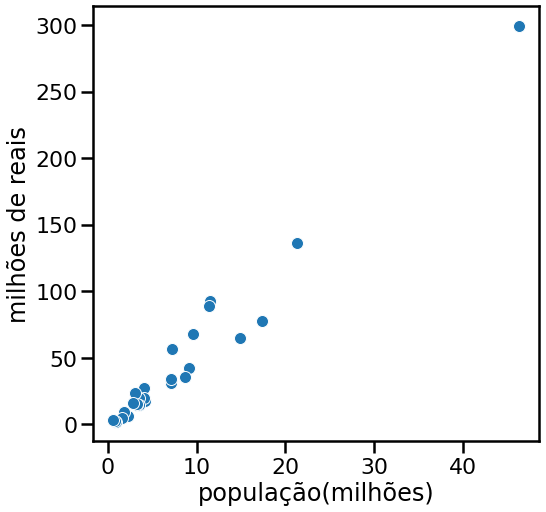

In [39]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=populacao_gastos_jun2020/1000000,x='populacao',y='gastos')

plt.ylabel('milhões de reais')
plt.xlabel('população(milhões)')
plt.show()

##Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

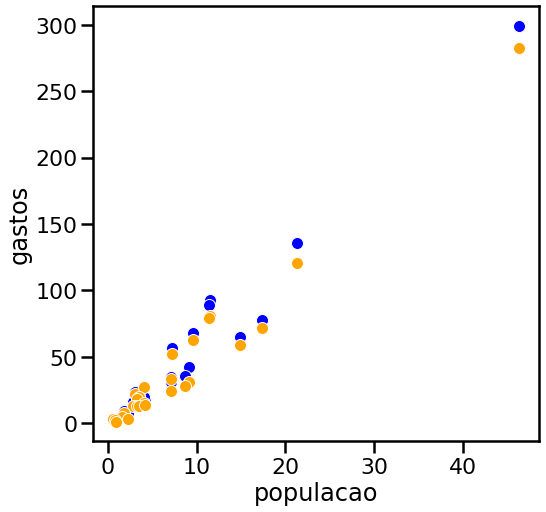

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=populacao_gastos_jun2020/1000000, x='populacao', y ='gastos',color='b')
sns.scatterplot(data=populacao_gastos_mais_recente/1000000, x='populacao', y ='gastos',color='orange')
plt.show()

##Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

#03. Ticks, escalas e formatação de imagens

##Formatação de ticks e escalas

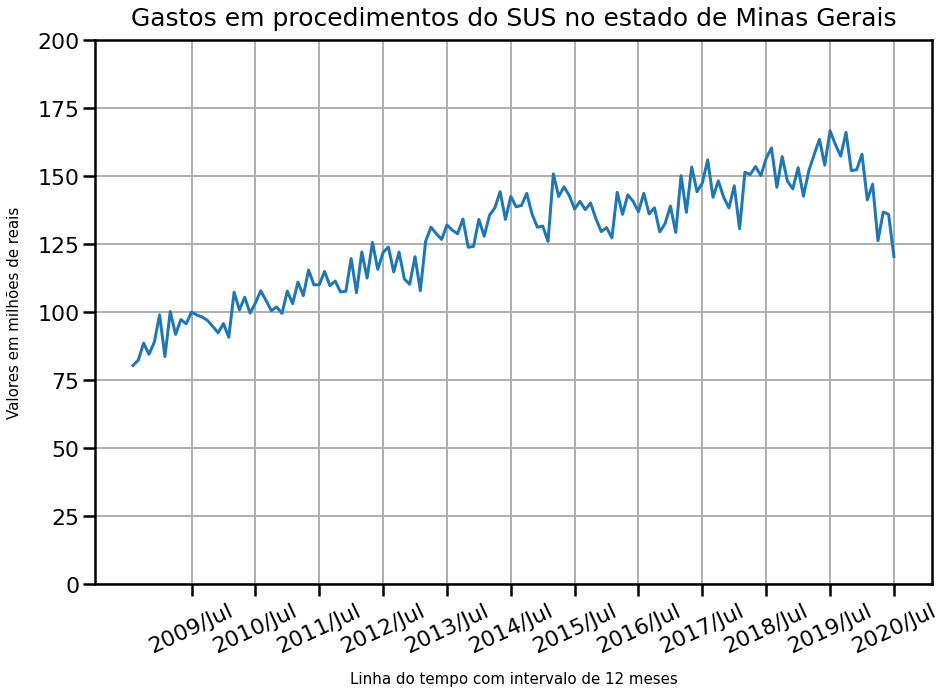

In [41]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=usaveis.T[6:]/1000000, x=usaveis.T.index[6:], y='31 Minas Gerais')

ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))

plt.ylim(0,200)

plt.title('Gastos em procedimentos do SUS no estado de Minas Gerais',fontsize=25,pad=15)

plt.ylabel('Valores em milhões de reais', fontsize = 15,labelpad=15)
plt.xlabel('Linha do tempo com intervalo de 12 meses', fontsize = 15,labelpad=15)

plt.grid(True)
plt.xticks(rotation=25)
plt.show()


#04. Trabalhando DateTime e Melt

##Datas com Datetime




In [42]:
from datetime import date

In [43]:
date.today()

datetime.date(2021, 8, 5)

In [44]:
usaveis.index=usaveis.index.str[3:]

In [45]:
mensal = usaveis.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,...,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,...,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,...,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,...,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,...,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [46]:
mensal.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

In [47]:
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

In [48]:
def ano_mes(ano_mes : str):

  ano : int = int(ano_mes[:4])
  mes : str = ano_mes[5:]
  mes_numero : int = meses[mes]

  return date(ano, mes_numero, 1)

In [49]:
mensal.index = mensal.index.map(ano_mes)

In [50]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,...,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,...,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,...,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,...,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,...,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


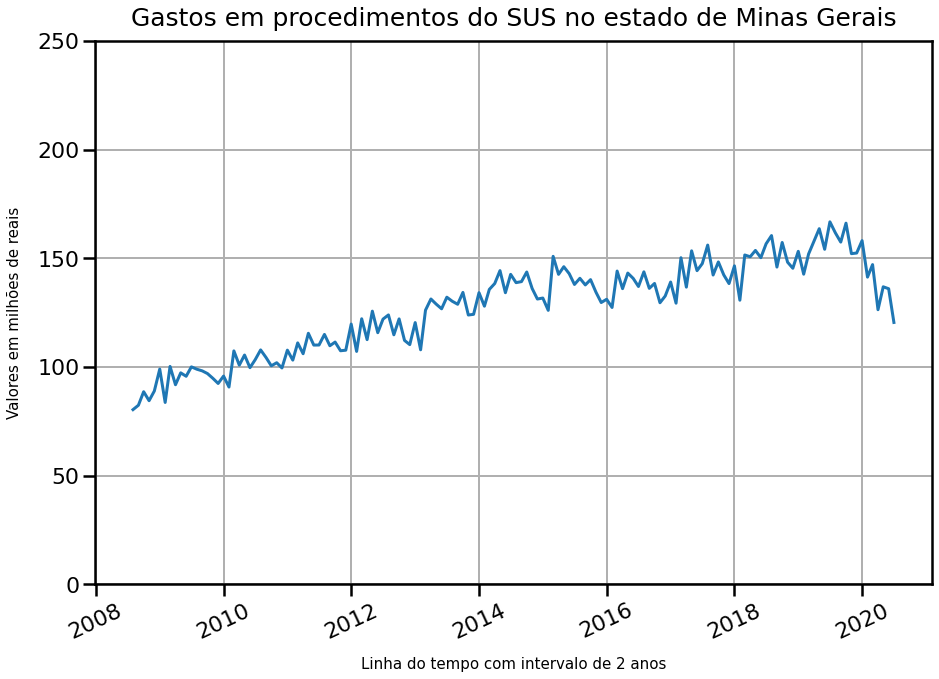

In [51]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=mensal[6:]/1000000, x=mensal[6:].index, y='Minas Gerais')

#ax.xaxis.set_major_locator(ticker.AutoLocator())

plt.ylim(0,250)

plt.title('Gastos em procedimentos do SUS no estado de Minas Gerais',fontsize=25,pad=15)

plt.ylabel('Valores em milhões de reais', fontsize = 15,labelpad=15)
plt.xlabel('Linha do tempo com intervalo de 2 anos', fontsize = 15,labelpad=15)

plt.grid(True)
plt.xticks(rotation=25)
plt.show()

In [52]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

##Manipulação de dados com Melt

In [53]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"],value_vars=mensal.columns)

In [54]:
mensal_aberto.columns = ['mes', 'uf', 'gasto']

In [55]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


In [56]:
mensal_aberto['gasto']=mensal_aberto['gasto']/1000000

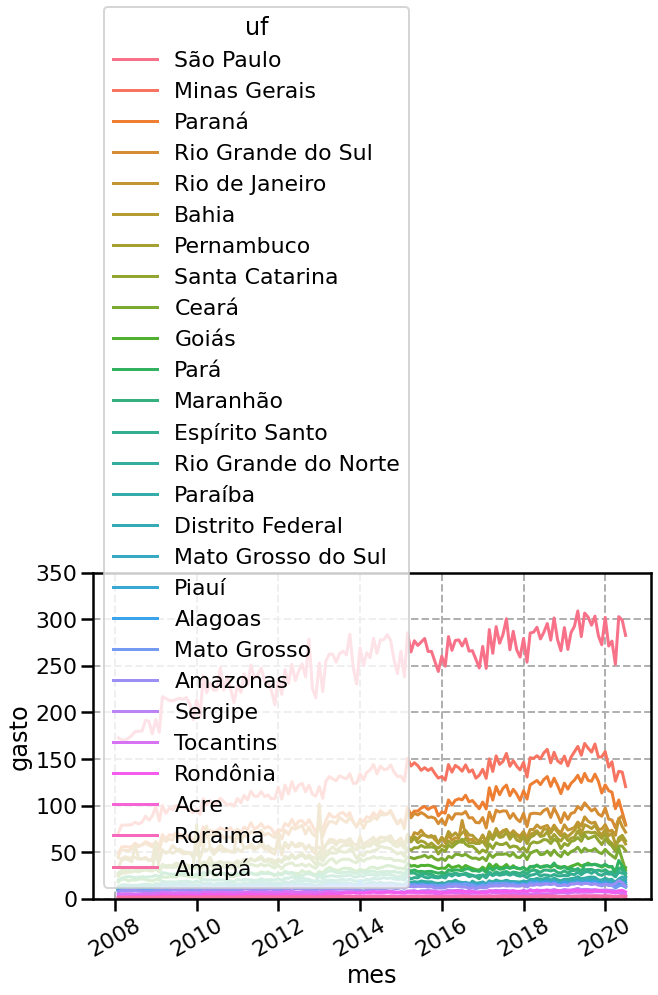

In [57]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue='uf')
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

##Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [58]:
mensal_fechado = mensal_aberto.pivot(index=["mes"], columns='uf')

In [59]:
mensal_fechado.columns.name = None

In [60]:
mensal_fechado.head()

gasto                                                      \
uf          Acre Alagoas Amapá Amazonas Bahia Ceará Distrito Federal   
mes                                                                    
2008-02-01  1.74    8.11  1.28     7.93 33.41 27.64            10.22   
2008-03-01  2.06    9.21  1.18     8.64 41.30 30.09            11.63   
2008-04-01  2.06   10.47  1.40     8.53 42.83 31.38            11.92   
2008-05-01  2.23    9.84  1.41     9.08 42.07 31.19            11.90   
2008-06-01  2.11   10.29  1.42     8.65 39.91 29.46            11.97   

                                          ...                            \
uf         Espírito Santo Goiás Maranhão  ... Piauí Rio Grande do Norte   
mes                                       ...                             
2008-02-01          10.03 18.15    13.45  ...  9.71                9.11   
2008-03-01          12.26 20.99    14.75  ... 10.43               10.13   
2008-04-01          12.45 21.05    15.15  ... 10.23               10.96   
2008-05-01          11.79 19.16    14.54  ... 10.56               11.03   
2008-06-01          11.89 20.33    14.55  ... 10.47               10.45   

                                                                             \
uf         Rio Grande do Sul Rio de Janeiro Rondônia Roraima Santa Catarina   
mes                                                                           
2008-02-01             45.90          44.12     1.94    0.77          24.41   
2008-03-01             52.93          42.89     1.96    0.88          27.48   
2008-04-01             51.97          45.30     2.14    0.90          27.81   
2008-05-01             51.68          43.95     2.28    1.03          28.35   
2008-06-01             53.76          44.10     2.62    0.94          28.99   

                                        
uf         Sergipe São Paulo Tocantins  
mes                                     
2008-02-01    4.64    172.83      5.05  
2008-03-01    5.02    170.48      5.20  
2008-04-01    5.27    170.28      5.34  
2008-05-01    5.37    172.40      5.34  
2008-06-01    4.98    175.42      5.40  

[5 rows x 27 columns]

##Desafio 03: Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y.


In [61]:
estados_escolhidos = ['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espírito Santo']

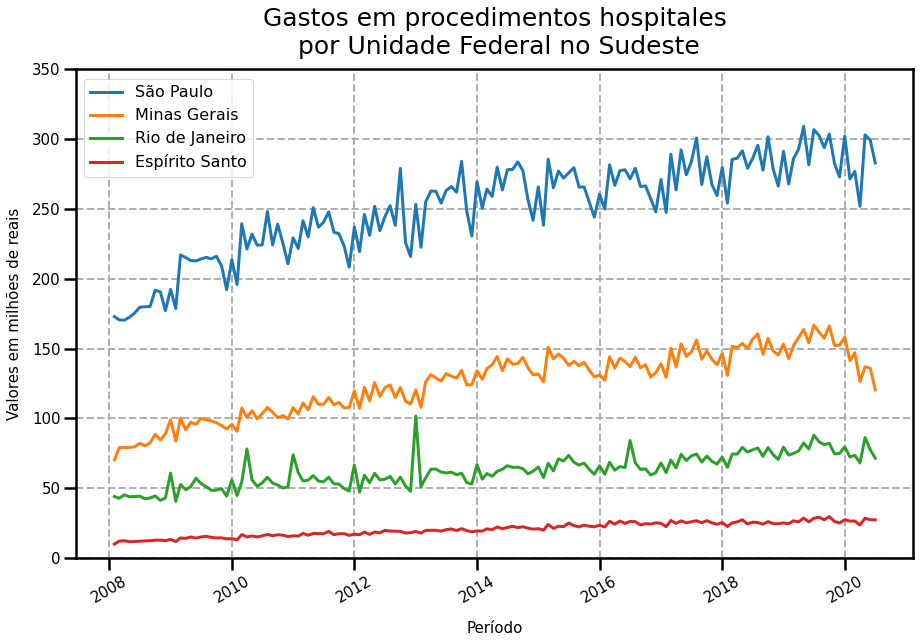

In [62]:
plt.figure(figsize=(15,9))
ax = sns.lineplot(data=mensal_aberto.query('uf in @estados_escolhidos'), x="mes", y="gasto",hue='uf')

sns.set_context('notebook')


plt.title('Gastos em procedimentos hospitales\n por Unidade Federal no Sudeste', pad=15, fontsize = 25)
plt.legend(loc = 'center', bbox_to_anchor = (0.11,0.88),fontsize = 16)

plt.ylabel('Valores em milhões de reais', fontsize = 15,labelpad = 10)
plt.xlabel('Período', fontsize = 15, labelpad=15)

plt.xticks(rotation=30,fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

#05. Manipulando datas e gerando novas análises

##Comparando gastos ano a ano

In [63]:
mensal_aberto.rename(columns={'mes':'ano-mes-dia'},inplace=True)

In [64]:
mensal_aberto.head()

,ano-mes-dia,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [65]:
mensal_aberto['ano-mes-dia']=mensal_aberto['ano-mes-dia'].astype('datetime64')

In [66]:
mensal_aberto['mes']=mensal_aberto['ano-mes-dia'].dt.month

In [67]:
mensal_aberto['ano'] = mensal_aberto['ano-mes-dia'].dt.year

In [68]:
dias_meses ={
    1: 31,
    2: 28, 
    3: 31, 
    4: 30, 
    5: 31, 
    6: 30, 
    7: 31, 
    8: 31, 
    9: 30, 
    10: 31, 
    11: 30, 
    12: 31
}

In [69]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto']/mensal_aberto['mes'].map(dias_meses)

In [70]:
mensal_aberto.head()

,ano-mes-dia,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


(0.0, 12.0)

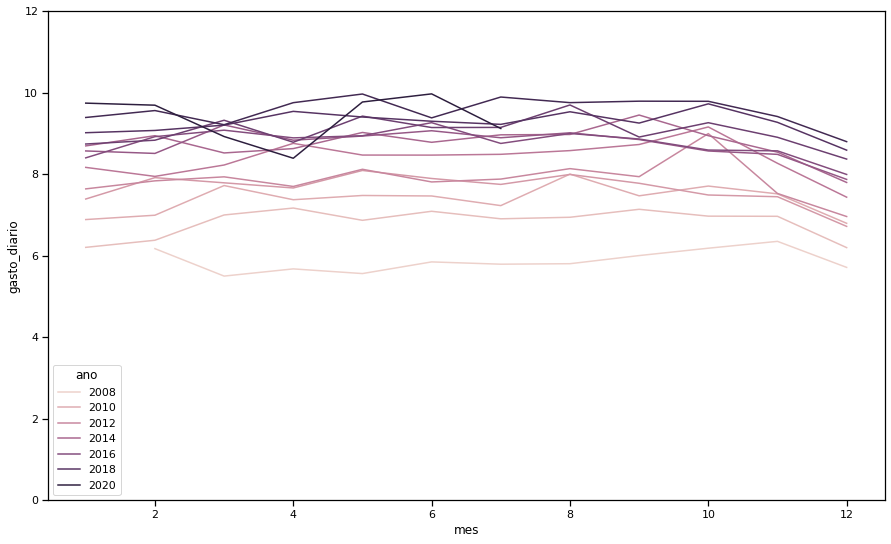

In [71]:
plt.figure(figsize=(15,9))
sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"),x='mes', y='gasto_diario', hue='ano')

plt.ylim(0,12)

##Desafio 01: Melhorar o gráfico ano a ano:

* Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (4039).

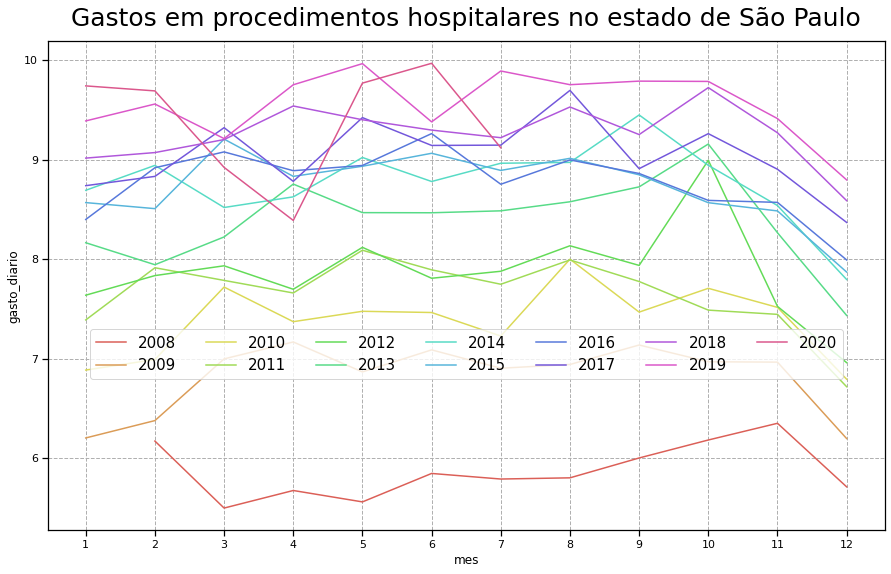

In [73]:
plt.figure(figsize=(15,9))

fig = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"),x='mes', y='gasto_diario', hue='ano', palette= sns.color_palette("hls",13))
plt.title("Gastos em procedimentos hospitalares no estado de São Paulo",fontsize=25,pad=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15,ncol=7,loc="center", bbox_to_anchor=(0.5,0.36))

plt.xticks(np.arange(1,13,step=1),meses.keys(), fontsize=15, rotation = 25)#poderia usar 'meses.keys()' no lugar de 'mensal_aberto['ano-mes-dia'][11:].dt.strftime("%b")'/mensal_aberto['ano-mes-dia'][11:].dt.strftime("%b")
plt.yticks(fontsize=15)
plt.xlabel("Meses (Jan-Dec)", fontsize=15,labelpad=15)
plt.ylabel("Valores em milhões de reais", fontsize=15, labelpad= 15)

plt.ylim(0,12)
plt.show()

##Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

In [ ]:
estados_escolhidos = ['São Paulo', 'Minas Gerais']

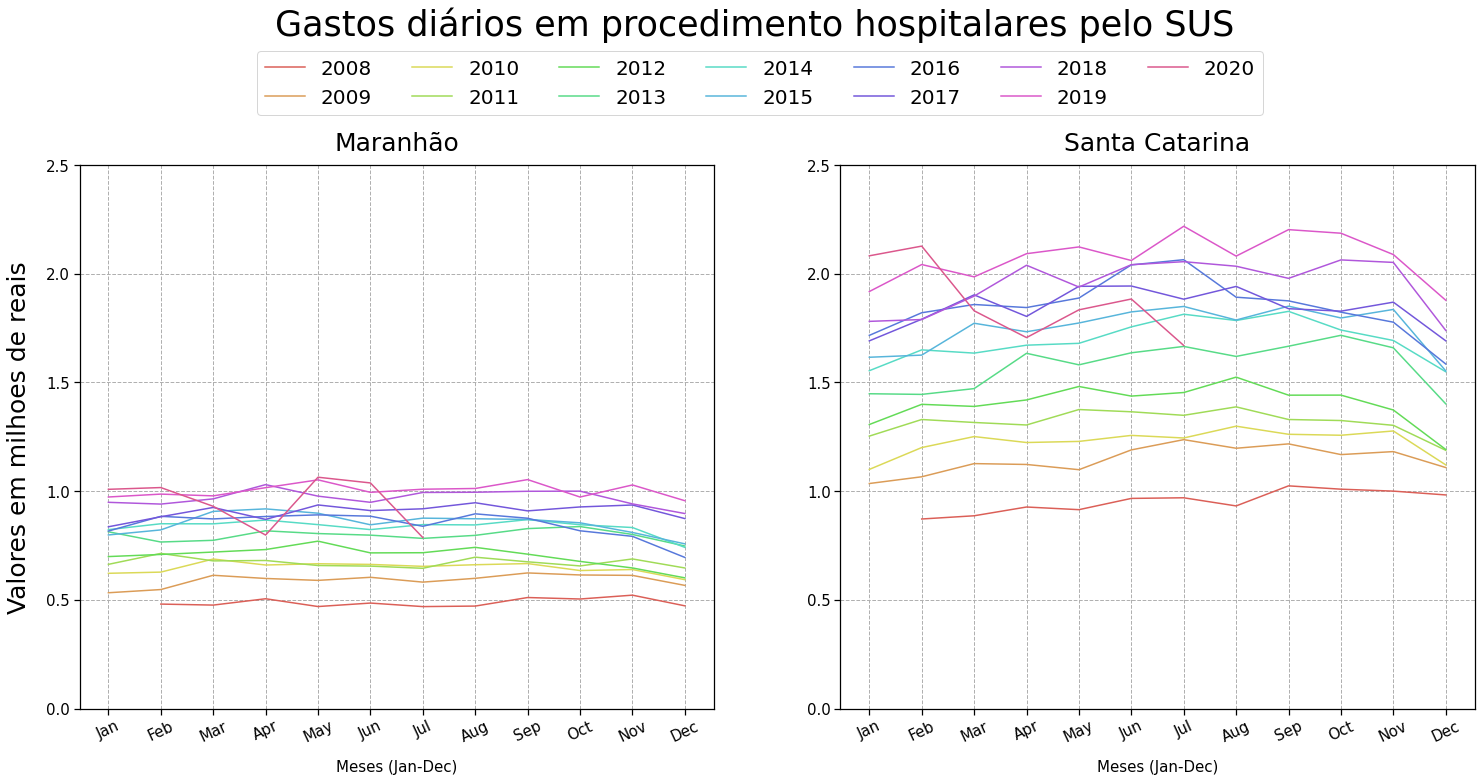

In [ ]:
limite = [0,2.5]
plt.figure(figsize=(25,10), facecolor='w')
plt.suptitle("Gastos diários em procedimento hospitalares pelo SUS",fontsize=35, y=1.1,ha="center")
 
plt.subplot(121)
sns.lineplot(data=mensal_aberto.query("uf =='Maranhão'"),x='mes', y='gasto_diario', hue='ano', palette=sns.color_palette("hls",13))
plt.title("Maranhão",fontsize=25,pad=15)
plt.grid(linestyle='--')
plt.legend(fontsize=20,ncol=7,loc="center", bbox_to_anchor=(1.073,1.15))
plt.xticks(np.arange(1,13,step=1),mensal_aberto['ano-mes-dia'][11:].dt.strftime("%b"), fontsize=15, rotation = 25)#poderia usar 'meses.keys()' no lugar de 'mensal_aberto['ano-mes-dia'][11:].dt.strftime("%b")'
plt.yticks(fontsize=15)
plt.xlabel("Meses (Jan-Dec)", fontsize=15,labelpad=15)
plt.ylabel("Valores em milhoes de reais", fontsize=25, labelpad= 15)
plt.ylim(limite)
 
plt.subplot(122)
sns.lineplot(data=mensal_aberto.query("uf =='Santa Catarina'"),x='mes', y='gasto_diario', hue='ano', palette=sns.color_palette("hls",13),legend=False)
plt.title("Santa Catarina",fontsize=25,pad=15)
plt.grid(linestyle='--')
plt.xticks(np.arange(1,13,step=1),mensal_aberto['ano-mes-dia'][11:].dt.strftime("%b"), fontsize=15, rotation = 25)#poderia usar 'meses.keys()' no lugar de 'mensal_aberto['ano-mes-dia'][11:].dt.strftime("%b")'
plt.yticks(fontsize=15)
plt.xlabel("Meses (Jan-Dec)", fontsize=15,labelpad=15)
plt.ylabel(" ")
plt.ylim(limite)
 
plt.show()

#06. Agrupando dados e analisando por categoria

##Avançando em pandas e seaborn




In [ ]:
estado_a_se_analisar = ['São Paulo','Minas Gerais', 'Rio de Janeiro']

In [ ]:
por_ano=mensal_aberto.query("uf in @estado_a_se_analisar").groupby(["uf","ano"]).sum().reset_index()

In [ ]:
por_ano.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,894.35,77,29.44
1,Minas Gerais,2009,1149.14,78,37.77
2,Minas Gerais,2010,1217.49,78,40.03
3,Minas Gerais,2011,1315.02,78,43.24
4,Minas Gerais,2012,1408.35,78,46.29


In [ ]:
sns.barplot(data=por_ano, x='ano',y='gasto',hue='uf')

In [ ]:
sns.catplot(data=por_ano,x='ano',y='gasto',hue='uf')

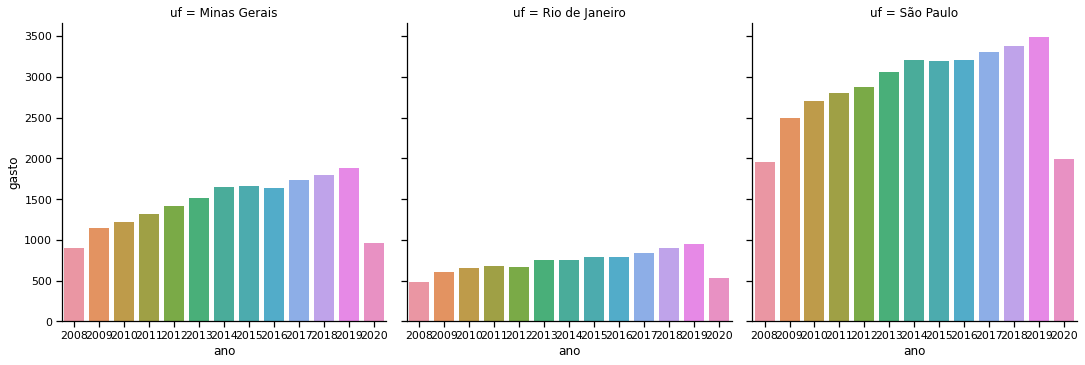

In [ ]:
sns.catplot(data=por_ano,x='ano',y='gasto',kind='bar',col='uf')

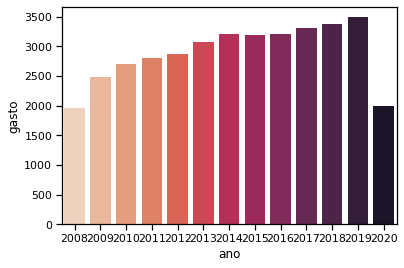

In [ ]:
sns.barplot(data=por_ano.query("uf=='São Paulo'"), x='ano', y='gasto', palette=sns.color_palette('rocket_r', 13))